# Twitter Sentiment Analysis

## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re 
import string
import wordcloud

import nltk
from nltk.stem.porter import PorterStemmer

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


## Loading the Dataset

In [ ]:
# importing dataset 

df = pd.read_csv('dataset.csv')
df = df.drop('id', axis=1)


In [ ]:
# shape of the dataset 

df.shape    

(31962, 2)

In [ ]:
df.head()   

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [ ]:
df.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Preprocessing the Dataset



In [ ]:
# checking for any NaN Value

df.isnull().any()

label    False
tweet    False
dtype: bool

In [ ]:
# checking for any Duplicate Value

df.duplicated().any()

True

In [ ]:
# Removing duplicates of Dataset.

df.drop_duplicates(subset=['tweet'], keep='last', inplace=True)
print("Shape of dataset after removing duplicates:", df.shape)

Shape of dataset after removing duplicates: (29530, 2)


In [ ]:
# resetting Index after deletion of duplicates

df = df.reset_index()
df = df.drop('index', axis=1)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...


In [ ]:
# removes 'pattern' in the input text

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)         # finding all same patterns 
  for word in r:
    input_txt = re.sub(word, "", input_txt)  # substituting pattern with ""
  return input_txt

In [ ]:
print("Before Cleaning the data: ")
df.head()

Before Cleaning the data: 


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...


In [ ]:
# remove twitter handles (@user)

df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...


In [ ]:
# remove special characters, numbers and punctuations.

df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,factsguide society now #motivation
4,0,huge fan fare and big talking before the...


In [ ]:
# removing short words (less than 3 alphabets)

df['tweet'] = df['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
df.head()

,label,tweet
0,0,when father dysfunctional selfish drags kids i...
1,0,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty
3,0,factsguide society #motivation
4,0,huge fare talking before they leave chaos disp...


In [ ]:
# Function to remove Hash from HashTags

    # def remove_hash(tweet):
    #     tweet = re.sub(r'#','',tweet)
    #     return tweet 

    # df['tweet'] = df['tweet'].apply(remove_hash) 


In [ ]:
# Tokenization (Individual words are considered as tokens)

tokenized_tweet = df['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                   [factsguide, society, #motivation]
4    [huge, fare, talking, before, they, leave, cha...
Name: tweet, dtype: object

In [ ]:
# Stem the words
# converting forms of verb (play/playing/played) as a common word

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                         [factsguid, societi, #motiv]
4    [huge, fare, talk, befor, they, leav, chao, di...
Name: tweet, dtype: object

In [ ]:
# combine words into "Single Sentence"

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['tweet'] = tokenized_tweet
df.head()

,label,tweet
0,0,when father dysfunct selfish drag kid into dys...
1,0,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesti
3,0,factsguid societi #motiv
4,0,huge fare talk befor they leav chao disput whe...


## Exploratory Data Analysis

In [ ]:
# checking out the NEGATIVE comments from the train set

df[df['label'] == 0].head(10)

,label,tweet
0,0,when father dysfunct selfish drag kid into dys...
1,0,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesti
3,0,factsguid societi #motiv
4,0,huge fare talk befor they leav chao disput whe...
5,0,camp tomorrow danni
6,0,next school year year exam think about that #s...
7,0,love land #allin #cav #champion #cleveland #cl...
8,0,welcom here
9,0,#ireland consum price index climb from previou...


In [ ]:
# checking out the POSITIVE comments from the train set 

df[df['label'] == 1].head(10)

,label,tweet
12,1,#cnn call #michigan middl school build wall ch...
13,1,comment #australia #opkillingbay #seashepherd ...
15,1,retweet agre
21,1,lumpi say prove lumpi
31,1,unbeliev that centuri need someth like thi aga...
50,1,let fight against #love #peac
61,1,white establish have folx run around love them...
68,1,white peopl call peopl white #race #ident #med
98,1,interest #linguist that doesn address #race ra...
101,1,mock obama be black #brexit


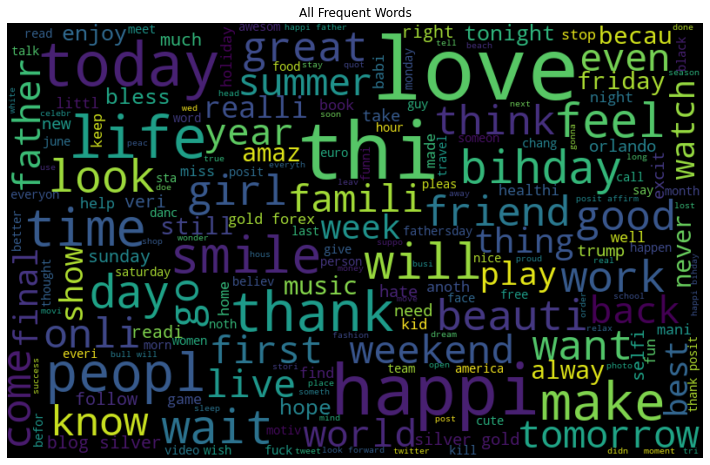

In [ ]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('All Frequent Words')
plt.axis('off')
plt.show()

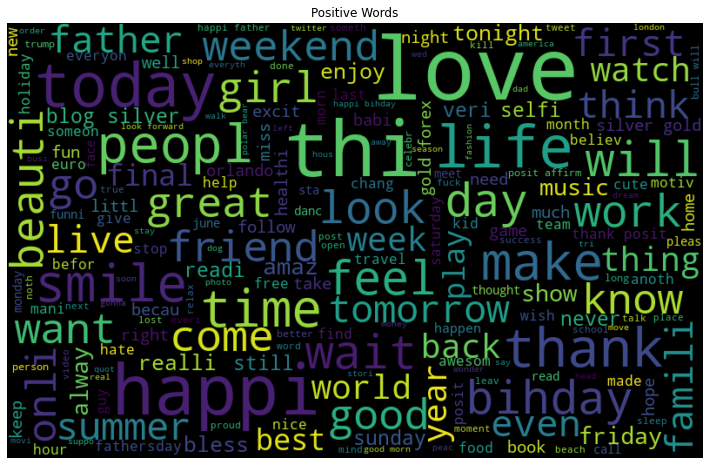

In [ ]:
# frequent words visualization for +ve ( labelled = 0 )

all_words = " ".join([ sentence for sentence in df['tweet'][df['label']==0] ])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')
plt.show()


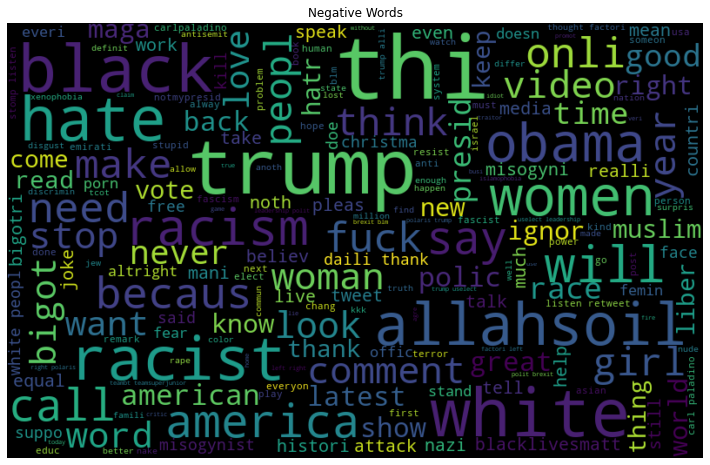

In [ ]:
# frequent words visualization for -ve (labelled = 1)

all_words = " ".join([sentence for sentence in df['tweet'][df['label']==1 ]])

wordcloud = WordCloud(width=800, height=500, max_font_size=100, random_state=42).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')
plt.show()


In [ ]:
# Extract the hashtag

def hashtag_extract(tweets):
  hashtags = []
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags


In [ ]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['tweet'][df['label'] == 0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['tweet'][df['label'] == 1])


In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['motiv'], ['allshowandnogo']]

In [ ]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [ ]:
# un-nest list

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'motiv']

In [ ]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [ ]:
# checking Frequencies of 'Positive' Hashtags

freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                    'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,motiv,185


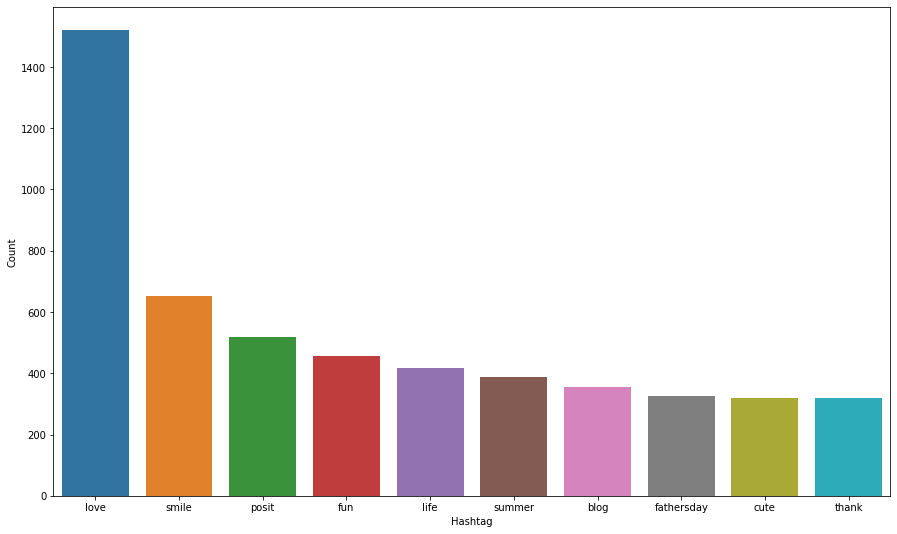

In [ ]:
# select top 10 +ve hashtags

d = d.nlargest(columns = 'Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# checking Frequencies of 'Negative' Hashtags


freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,13
3,australia,6
4,opkillingbay,5


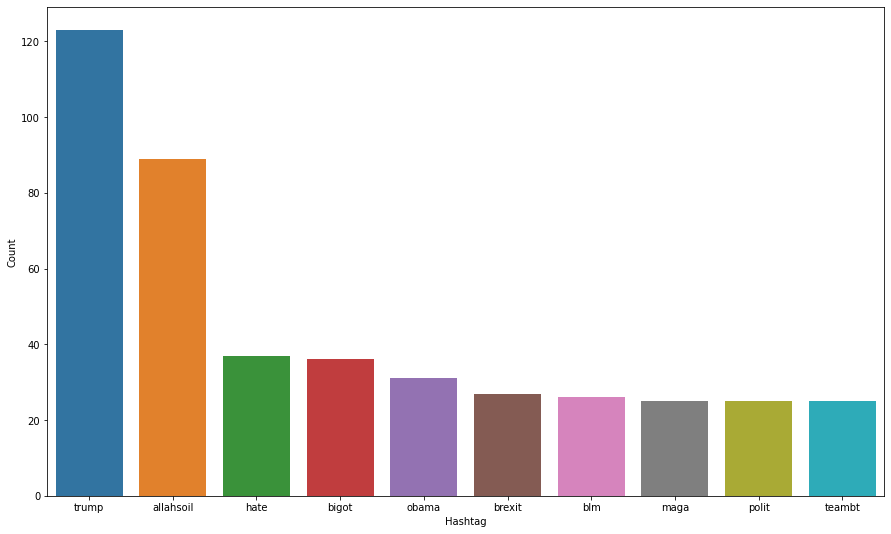

In [ ]:
# select top 10 -ve hashtags

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
# To Store cleaned dataframe in csv file

# df.to_csv(r'dataset_cleaned.csv', index=False)

## Input Split


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score


### Feature Extraction & Train-Test Split of Dataset 

In [4]:
df = pd.read_csv('Twitter Sentiment Cleaned.csv')

In [5]:
X = df['tweet'].astype(str) 
y = df['label'].astype(str) 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  145249


In [7]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Machine Learning Models

In [15]:
models = {
    
    'Logistics_Regression' :{
        'model' : LogisticRegression(multi_class = 'auto'),
        'parameters' : {
            'C' : [90], 'solver' : ['lbfgs']
        }
    },
    
    'SVC' :{
        'model' : SVC(),
        'parameters' : {
            'C': [10], 'gamma': [1], 'kernel': ['linear']
        }
    },

    'MultinomialNB' :{
        'model' : MultinomialNB(),
        'parameters' : {
            'alpha' : np.linspace(0.5,1), 'fit_prior' : [True]
        }
    },
    
     'Decision_Tree' :{
        'model' : DecisionTreeClassifier(),
         'parameters' : {
            
        }

    },
    
    'XGBClassifier' :{
        'model' : XGBClassifier(),
        'parameters' : {
            
        }
           
    },
    
    'Random_Forest' :{
        'model' : RandomForestClassifier(),
        'parameters' : {
            'n_estimators' : [95], 
            'max_depth':[None], 'criterion':['gini']
        }
    }
}

In [16]:
score = []

for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['parameters'], cv=5, n_jobs=-1) # Using Cross Validation of 5 and n_jobs=-1 for fast training by using all the processors
    print(mp['model'])
    print('\nFitting...')
    best_model = clf.fit(X_train, y_train)                      # Training the model
    clf_pred = best_model.predict(X_test)                       # Predicting the results
    print(confusion_matrix(y_test,clf_pred))                    # Printing Confusion Matrix
    print(metrics.classification_report(y_test, clf_pred))      # Printing Classification Report
    score.append({                                              # Appending results to 'scores' list
        'model' : model_name,
        'best_accuracy' : best_model.score(X_test, y_test),
        'best_parameters' : clf.best_params_
    })
    print('\nThe score is appended to the list...\n')
    


LogisticRegression()

Fitting...
[[5435   48]
 [ 172  251]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5483
           1       0.84      0.59      0.70       423

    accuracy                           0.96      5906
   macro avg       0.90      0.79      0.84      5906
weighted avg       0.96      0.96      0.96      5906


The score is appended to the list...

SVC()

Fitting...
[[5433   50]
 [ 165  258]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5483
           1       0.84      0.61      0.71       423

    accuracy                           0.96      5906
   macro avg       0.90      0.80      0.84      5906
weighted avg       0.96      0.96      0.96      5906


The score is appended to the list...

MultinomialNB()

Fitting...
[[5483    0]
 [ 369   54]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5483

In [17]:
# Creating DataFrame with model, best_accuracy and best_parameters:
res = pd.DataFrame(score, columns=['model', 'best_accuracy', 'best_parameters'])
res

,model,best_accuracy,best_parameters
0,Logistics_Regression,0.962750,"{'C': 90, 'solver': 'lbfgs'}"
1,SVC,0.963596,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}"
2,MultinomialNB,0.937521,"{'alpha': 0.5, 'fit_prior': True}"
3,Decision_Tree,0.944802,{}
4,XGBClassifier,0.947680,{}
5,Random_Forest,0.958686,"{'criterion': 'gini', 'max_depth': None, 'n_es..."


#### Best Accuracy - SVC ( 0.963596 )